<a id='sect0'></a>
## <font color='darkblue'>50 scikit-learn tips</font>
([course link](https://courses.dataschool.io/courses/scikit-learn-tips/986247-using-pandas/2350280-5-four-reasons-to-use-scikit-learn-not-pandas-for-ml-preprocessing))
* <font size='3ptx'><b><a href='#sect1'>Data Preprocessing</a></b></font>
* <font size='3ptx'><b><a href='#sect2'>Using pandas</a></b></font>
* <font size='3ptx'><b><a href='#sect3'>Categorical Features</a></b></font>
* <font size='3ptx'><b><a href='#sect4'>Missing Values</a></b></font>
* <font size='3ptx'><b><a href='#sect5'>Pipelines</a></b></font>
* <font size='3ptx'><b><a href='#sect6'>Parameter Tuning</a></b></font>
* <font size='3ptx'><b><a href='#sect7'>Model Evaluation</a></b></font>
* <font size='3ptx'><b><a href='#sect8'>Model Inspection</a></b></font>
* <font size='3ptx'><b><a href='#sect9'>Model Ensembling</a></b></font>
* <font size='3ptx'><b><a href='#sect10'>Feature Engineering</a></b></font>
* <font size='3ptx'><b><a href='#sect11'>Coding Practices</a></b></font>

<a id='sect1'></a>
## <font color='darkblue'>Data Preprocessing</font>
([course link](https://courses.dataschool.io/courses/scikit-learn-tips/986239-data-preprocessing))

<a id='sect2'></a>
## <font color='darkblue'>Using pandas</font>
([course link](https://courses.dataschool.io/courses/scikit-learn-tips/986247-using-pandas))
* <font size='3ptx'><b><a href='#sect2_1'>5 Reasons to use scikit-learn (not pandas) for ML preprocessing</a></b></font>
* <font size='3ptx'><b><a href='#sect2_2'>Don't use .values when passing a pandas object to scikit-learn</a></b></font>
* <font size='3ptx'><b><a href='#sect2_3'>Load a toy dataset into a DataFrame</a></b></font>

<a id='sect2_1'></a>
### <font color='darkgreen'>5 Reasons to use scikit-learn (not pandas) for ML preprocessing</font>
([course link](https://courses.dataschool.io/courses/scikit-learn-tips/986247-using-pandas/2350280-5-four-reasons-to-use-scikit-learn-not-pandas-for-ml-preprocessing)) Reasons to use scikit-learn (not pandas) for <a href='https://scikit-learn.org/stable/modules/preprocessing.html'>ML preprocessing</a>:
1. You can cross-validate the entire workflow
2. You can <a href='https://scikit-learn.org/stable/modules/grid_search.html'>grid search model</a> & preprocessing hyperparameters
3. Avoids adding new columns to the source DataFrame
4. pandas lacks separate fit/transform steps to prevent <a href='https://scikit-learn.org/stable/common_pitfalls.html#data-leakage'>data leakage</a>

<a id='sect2_2'></a>
### <font color='darkgreen'>Don't use .values when passing a pandas object to scikit-learn</font>
([course link](https://courses.dataschool.io/courses/scikit-learn-tips/986247-using-pandas/2780365-35-don-t-use-values-when-passing-a-pandas-object-to-scikit-learn)) There's no need to use ".values" when passing a DataFrame or Series to scikit-learn... it knows how to access the underlying NumPy array!

In [1]:
import pandas as pd
df = pd.read_csv('http://bit.ly/kaggletrain', usecols=['Survived', 'Pclass', 'Fare'])

In [2]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [3]:
X = df[['Pclass', 'Fare']]
y = df['Survived']

In [4]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [5]:
# there's no need to use X.values or y.values
clf.fit(X, y)

LogisticRegression()

<a id='sect2_3'></a>
### <font color='darkgreen'>Load a toy dataset into a DataFrame</font>
New in version 0.23: Need to load a toy dataset into a DataFrame, including column names? Set <font color='blue'>as_frame=True</font>. Want features and target as separate objects? Also set <font color='blue'>return_X_y=True</font>.

In [9]:
from sklearn.datasets import load_iris

In [10]:
# return DataFrame with features and target
df = load_iris(as_frame=True)['frame']

In [11]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [12]:
# return DataFrame with features and Series with target
X, y = load_iris(as_frame=True, return_X_y=True)

In [13]:
X.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [14]:
y.head(3)

0    0
1    0
2    0
Name: target, dtype: int32

<a id='sect3'></a>
## <font color='darkblue'>Categorical Features</font>
([course link](https://courses.dataschool.io/courses/scikit-learn-tips/986249-categorical-features))
* <font size='3ptx'><b><a href='#sect3_1'>Encode categorical features using OneHotEncoder or OrdinalEncoder</a></b></font>
* <font size='3ptx'><b><a href='#sect3_2'>Handle unknown categories with OneHotEncoder by encoding them as zeros</a></b></font>
* <font size='3ptx'><b><a href='#sect3_3'>Three reasons not to use drop='first' with OneHotEncoder</a></b></font>
* <font size='3ptx'><b><a href='#sect3_4'>Drop the first category from binary features (only) with OneHotEncoder</a></b></font>
* <font size='3ptx'><b><a href='#sect3_5'>Use OrdinalEncoder instead of OneHotEncoder with tree-based models</a></b></font>

<a id='sect3_1'></a>
### <font color='darkgreen'>Encode categorical features using OneHotEncoder or OrdinalEncoder</font>
Two common ways to encode categorical features:
* <b><a href='https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html'>OneHotEncoder</a></b> for unordered (nominal) data
* <b><a href='https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html'>OrdinalEncoder</a></b> for ordered (ordinal) data

<b>P.S.</b> <b><a href='https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html'>LabelEncoder</a></b> is for labels, not features!

In [15]:
import pandas as pd
X = pd.DataFrame({'Shape':['square', 'square', 'oval', 'circle'],
                  'Class': ['third', 'first', 'second', 'third'],
                  'Size': ['S', 'S', 'L', 'XL']})

In [16]:
# "Shape" is unordered, "Class" and "Size" are ordered
X

,Shape,Class,Size
0,square,third,S
1,square,first,S
2,oval,second,L
3,circle,third,XL


In [17]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [18]:
# left-to-right column order is alphabetical (circle, oval, square)
ohe = OneHotEncoder(sparse=False)
ohe.fit_transform(X[['Shape']])

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [19]:
# category ordering (within each feature) is defined by you
oe = OrdinalEncoder(categories=[['first', 'second', 'third'], ['S', 'M', 'L', 'XL']])
oe.fit_transform(X[['Class', 'Size']])

array([[2., 0.],
       [0., 0.],
       [1., 2.],
       [2., 3.]])

<a id='sect3_2'></a>
### <font color='darkgreen'>Handle unknown categories with OneHotEncoder by encoding them as zeros</font>
<b>Q:</b> For a <a href='https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features'>one-hot encoded</a> feature, what can you do if new data contains categories that weren't seen during training?<br/>
<b>A:</b> Set handle_unknown='ignore' to encode new categories as all zeros.<br/>

P.S. If you know all possible categories that might ever appear, you can instead specify the categories manually. <b><font color='blue'>handle_unknown='ignore'</font> is useful specifically when you don't know all possible categories</b>.

In [20]:
import pandas as pd
X = pd.DataFrame({'col':['A', 'B', 'C', 'B']})
X_new = pd.DataFrame({'col':['A', 'C', 'D']})

In [21]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [22]:
X

,col
0,A
1,B
2,C
3,B


In [23]:
# three columns represent categories A, B, and C
ohe.fit_transform(X[['col']])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [24]:
# category D was not learned by OneHotEncoder during the "fit" step
X_new

,col
0,A
1,C
2,D


In [25]:
# category D is encoded as all zeros
ohe.transform(X_new[['col']])

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 0.]])

<a id='sect3_3'></a>
### <font color='darkgreen'>Three reasons not to use drop='first' with OneHotEncoder</font>
In most cases, I recommend that you don't use <font color='blue'>drop='first'</font> with <b><a href='https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html'>OneHotEncoder</a></b>. Here's why:
1. Multicollinearity is rarely an issue with scikit-learn models
2. <font color='blue'>drop='first'</font> is incompatible with handle_unknown='ignore'
3. May be problematic if you standardize all features or use a regularized model

<b>Note:</b> Beginning in scikit-learn 1.0, <font color='blue'>drop='first'</font> and <font color='blue'>handle_unknown='ignore'</font> can be used together. <font color='darkred'><b>However, the dropped category and an unknown category will both be encoded as all zeros</b></font>.

<a id='sect3_4'></a>
### <font color='darkgreen'>Drop the first category from binary features (only) with OneHotEncoder</font>
<b>New in version 0.23:</b> Use <font color='blue'>drop='if_binary'</font> with <b><a href='https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html'>OneHotEncoder</a></b> to drop the first category ONLY if it's a binary feature (<font color='brown'>meaning it has exactly two categories</font>).

<b>Note:</b> Beginning in scikit-learn 1.0, <font color='blue'>drop='first'</font> and <font color='blue'>drop='if_binary'</font> can both be used with <font color='blue'>handle_unknown='ignore'</font>. However, the dropped category and an unknown category will both be encoded as all zeros.

In [26]:
import pandas as pd
X = pd.DataFrame({'Shape':['circle', 'oval', 'square', 'square'],
                  'Color': ['pink', 'yellow', 'pink', 'yellow']})

In [27]:
from sklearn.preprocessing import OneHotEncoder

In [28]:
# Shape has 3 categories, Color has 2 categories
X

,Shape,Color
0,circle,pink
1,oval,yellow
2,square,pink
3,square,yellow


In [29]:
# drop=None (default) creates one feature column per category
ohe = OneHotEncoder(sparse=False, drop=None)
ohe.fit_transform(X)

array([[1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 1.]])

In [30]:
# drop='first' drops the first category in each feature
ohe = OneHotEncoder(sparse=False, drop='first')
ohe.fit_transform(X)

array([[0., 0., 0.],
       [1., 0., 1.],
       [0., 1., 0.],
       [0., 1., 1.]])

In [31]:
# drop='if_binary' drops the first category of binary features
ohe = OneHotEncoder(sparse=False, drop='if_binary')
ohe.fit_transform(X)

array([[1., 0., 0., 0.],
       [0., 1., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 1.]])

<a id='sect3_5'></a>
### <font color='darkgreen'>Use OrdinalEncoder instead of OneHotEncoder with tree-based models</font>
With a <b><a href='https://scikit-learn.org/stable/modules/tree.html'>tree-based model</a></b>, try <b><a href='https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html'>OrdinalEncoder</a></b> instead of <b><a href='https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html'>OneHotEncoder</a></b> even for nominal (unordered) features.

Accuracy will often be similar, but <b><a href='https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html'>OrdinalEncoder</a></b> will be much faster!

<b>Additional links</b>: <a href='https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees'>Random Forests</a>

In [32]:
import pandas as pd
df = pd.read_csv('https://www.openml.org/data/get_csv/1595261/adult-census.csv')

In [33]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [34]:
categorical_cols = ['workclass', 'education', 'marital-status',
                    'occupation', 'relationship', 'race', 'sex']

In [35]:
X = df[categorical_cols]
y = df['class']

In [36]:
# OneHotEncoder creates 60 columns
ohe = OneHotEncoder()
ohe.fit_transform(X).shape

(48842, 60)

In [37]:
# OrdinalEncoder creates 7 columns
oe = OrdinalEncoder()
oe.fit_transform(X).shape

(48842, 7)

In [38]:
# Random Forests is a tree-based model
rf = RandomForestClassifier(random_state=1, n_jobs=-1)

In [39]:
# Pipeline containing OneHotEncoder
ohe_pipe = make_pipeline(ohe, rf)
%time cross_val_score(ohe_pipe, X, y).mean()

Wall time: 22.5 s


0.8262561170407418

In [40]:
# Pipeline containing OrdinalEncoder
oe_pipe = make_pipeline(oe, rf)
%time cross_val_score(oe_pipe, X, y).mean()

Wall time: 3.42 s


0.8256623624061437

<a id='sect4'></a>
## <font color='darkblue'>Missing Values</font> ([back](#sect0))
([course link](https://courses.dataschool.io/courses/scikit-learn-tips/986251-missing-values))
* <font size='3ptx'><b><a href='#sect4_1'>Add a missing indicator to encode "missingness" as a feature</a></b></font>
* <font size='3ptx'><b><a href='#sect4_2'>Impute missing values using `KNNImputer` or `IterativeImputer`</a></b></font>
* <font size='3ptx'><b><a href='#sect4_3'>`HistGradientBoostingClassifier` natively supports missing values</a></b></font>
* <font size='3ptx'><b><a href='#sect4_4'>Two ways to impute missing values for a categorical feature</a></b></font>

<a id='sect4_1'></a>
### <font color='darkgreen'>Add a missing indicator to encode "missingness" as a feature</font>
When <b><a href='https://scikit-learn.org/stable/modules/impute.html'>imputing missing values</a></b>, you can preserve info about which values were missing and use THAT as a feature! Why? <b>Sometimes there's a relationship between "missingness" and the target/label you are trying to predict</b>.

In [1]:
import pandas as pd
import numpy as np

In [3]:
X = pd.DataFrame({'Age':[20, 30, 10, np.nan, 10]})
X

,Age
0,20.0
1,30.0
2,10.0
3,NaN
4,10.0


In [4]:
from sklearn.impute import SimpleImputer

In [5]:
# impute the mean
imputer = SimpleImputer()
imputer.fit_transform(X)

array([[20. ],
       [30. ],
       [10. ],
       [17.5],
       [10. ]])

In [6]:
# impute the mean and add an indicator matrix (new in 0.21)
imputer = SimpleImputer(add_indicator=True)
imputer.fit_transform(X)

array([[20. ,  0. ],
       [30. ,  0. ],
       [10. ,  0. ],
       [17.5,  1. ],
       [10. ,  0. ]])

<a id='sect4_2'></a>
### <font color='darkgreen'>Impute missing values using KNNImputer or IterativeImputer</font>
([course link](https://courses.dataschool.io/courses/scikit-learn-tips/986251-missing-values/2350292-11-impute-missing-values-using-knnimputer-or-iterativeimputer)) Need something better than <b><a href='https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html'>SimpleImputer</a></b> for missing value imputation? Try <b><a href='https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html'>KNNImputer</a></b> or <b><a href='https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html'>IterativeImputer</a></b> (<font color='brown'>inspired by R's MICE package</font>). <b>Both are multivariate approaches</b> (<font color='brown'>they take other features into account!</font>)

In [7]:
import pandas as pd
df = pd.read_csv('http://bit.ly/kaggletrain', nrows=6)

In [9]:
cols = ['SibSp', 'Fare', 'Age']
X = df[cols]
X

,SibSp,Fare,Age
0,1,7.2500,22.0
1,1,71.2833,38.0
2,0,7.9250,26.0
3,1,53.1000,35.0
4,0,8.0500,35.0
5,0,8.4583,NaN


In [10]:
# new in 0.21, and still "experimental" so it must be enabled explicitly
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [11]:
impute_it = IterativeImputer()
impute_it.fit_transform(X)

array([[ 1.        ,  7.25      , 22.        ],
       [ 1.        , 71.2833    , 38.        ],
       [ 0.        ,  7.925     , 26.        ],
       [ 1.        , 53.1       , 35.        ],
       [ 0.        ,  8.05      , 35.        ],
       [ 0.        ,  8.4583    , 28.50639495]])

In [12]:
# new in 0.22
from sklearn.impute import KNNImputer

In [13]:
impute_knn = KNNImputer(n_neighbors=2)
impute_knn.fit_transform(X)

array([[ 1.    ,  7.25  , 22.    ],
       [ 1.    , 71.2833, 38.    ],
       [ 0.    ,  7.925 , 26.    ],
       [ 1.    , 53.1   , 35.    ],
       [ 0.    ,  8.05  , 35.    ],
       [ 0.    ,  8.4583, 30.5   ]])

<a id='sect4_3'></a>
### <font color='darkgreen'>HistGradientBoostingClassifier natively supports missing values</font>
Four options for handling missing values (NaNs):
* Drop rows containing NaNs
* Drop columns containing NaNs
* Fill NaNs with imputed values
* <a href='https://scikit-learn.org/stable/modules/ensemble.html#missing-values-support'>Use a model that natively handles NaNs</a> (NEW!)
<br/>

<b>Note</b>: Beginning in scikit-learn 1.0, <b><a href='https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingClassifier.html'>HistGradientBoostingClassifier</a></b> and <b><a href='https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingRegressor.html#sklearn.ensemble.HistGradientBoostingRegressor'>HistGradientBoostingRegressor</a></b> are considered stable (rather than experimental), and thus you no longer have to enable them explicitly.

In [14]:
import pandas as pd
train = pd.read_csv('http://bit.ly/kaggletrain')
test = pd.read_csv('http://bit.ly/kaggletest', nrows=175)

In [15]:
train = train[['Survived', 'Age', 'Fare', 'Pclass']]
test = test[['Age', 'Fare', 'Pclass']]

In [16]:
# count the number of NaNs in each column
train.isna().sum()

Survived      0
Age         177
Fare          0
Pclass        0
dtype: int64

In [17]:
test.isna().sum()

Age       36
Fare       1
Pclass     0
dtype: int64

In [18]:
label = train.pop('Survived')

In [19]:
# new in 0.22: this estimator (experimental) has native support for NaNs
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

In [20]:
clf = HistGradientBoostingClassifier()

In [21]:
# no errors, despite NaNs in train and test!
clf.fit(train, label)
clf.predict(test)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

<a id='sect4_4'></a>
### <font color='darkgreen'>Two ways to impute missing values for a categorical feature</font>
([course link](https://courses.dataschool.io/courses/scikit-learn-tips/986251-missing-values/2658940-27-two-ways-to-impute-missing-values-for-a-categorical-feature)) Need to <a href='https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html'>impute missing values</a> for a categorical feature? Two options:
* Impute the most frequent value
* Impute the value "missing", which treats it as a separate category

Additional links: <b><a href='https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html'>OneHotEncoder</a></b>

In [23]:
import pandas as pd
import numpy as np
X = pd.DataFrame({'Shape':['square', 'square', 'oval', 'circle', np.nan]})
X

,Shape
0,square
1,square
2,oval
3,circle
4,NaN


In [24]:
from sklearn.impute import SimpleImputer

In [25]:
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit_transform(X)

array([['square'],
       ['square'],
       ['oval'],
       ['circle'],
       ['square']], dtype=object)

In [26]:
imputer = SimpleImputer(strategy='constant', fill_value='missing')
imputer.fit_transform(X)

array([['square'],
       ['square'],
       ['oval'],
       ['circle'],
       ['missing']], dtype=object)

<a id='sect5'></a>
## <font color='darkblue'>Pipelines</font> ([back](#sect0))
([course link](https://courses.dataschool.io/courses/scikit-learn-tips/986252-pipelines))
* <font size='3ptx'><b><a href='#sect5_1'>Use Pipeline to chain together multiple steps</a></b></font>
* <font size='3ptx'><b><a href='#sect5_2'>What is the difference between Pipeline and make_pipeline?</a></b></font>
* <font size='3ptx'><b><a href='#sect5_3'>Examine the intermediate steps in a Pipeline</a></b></font>
* <font size='3ptx'><b><a href='#sect5_4'>Use the correct methods for each type of Pipeline</a></b></font>
* <font size='3ptx'><b><a href='#sect5_5'>Save a model or Pipeline using joblib</a></b></font>
* <font size='3ptx'><b><a href='#sect5_6'>Four ways to examine the steps of a Pipeline</a></b></font>
* <font size='3ptx'><b><a href='#sect5_7'>Add feature selection to a Pipeline</a></b></font>
* <font size='3ptx'><b><a href='#sect5_8'>Create an interactive diagram of a Pipeline in Jupyter</a></b></font>
* <font size='3ptx'><b><a href='#sect5_9'>Access part of a Pipeline using slicing</a></b></font>
* <font size='3ptx'><b><a href='#sect5_10'>Adapt this pattern to solve many Machine Learning problems</a></b></font>

<a id='sect5_1'></a>
### <font color='darkgreen'>Use Pipeline to chain together multiple steps</font>
([course link](https://courses.dataschool.io/courses/scikit-learn-tips/986252-pipelines/2350287-8-use-pipeline-to-chain-together-multiple-steps)) What does <b><a href='https://scikit-learn.org/stable/modules/compose.html#pipeline-chaining-estimators'>"pipeline"</a></b> do? It chains together multiple steps: output of each step is used as input to the next step. Makes it easy to apply the same <b><a href='https://scikit-learn.org/stable/modules/preprocessing.html'>preprocessing</a></b> to train and test!

In [3]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [2]:
train = pd.DataFrame({'feat1':[10, 20, np.nan, 2], 'feat2':[25., 20, 5, 3], 'label':['A', 'A', 'B', 'B']})
test = pd.DataFrame({'feat1':[30., 5, 15], 'feat2':[12, 10, np.nan]})

In [4]:
imputer = SimpleImputer()
clf = LogisticRegression()

In [5]:
# 2-step pipeline: impute missing values, then pass the results to the classifier
pipe = make_pipeline(imputer, clf)

In [6]:
train

,feat1,feat2,label
0,10.0,25.0,A
1,20.0,20.0,A
2,NaN,5.0,B
3,2.0,3.0,B


In [7]:
test

,feat1,feat2
0,30.0,12.0
1,5.0,10.0
2,15.0,NaN


In [8]:
features = ['feat1', 'feat2']
X, y = train[features], train['label']
X_new = test[features]

In [9]:
# pipeline applies the imputer to X before fitting the classifier
pipe.fit(X, y)

# pipeline applies the imputer to X_new before making predictions
# note: pipeline uses imputation values learned during the "fit" step
pipe.predict(X_new)

array(['A', 'B', 'A'], dtype=object)

<a id='sect5_2'></a>
### <font color='darkgreen'>What is the difference between Pipeline and make_pipeline?</font>
([course link](https://courses.dataschool.io/courses/scikit-learn-tips/986252-pipelines/2350293-12-what-is-the-difference-between-pipeline-and-make_pipeline)) <br/>
<b>Q:</b> What's the difference between Pipeline and make_pipeline? <br/>
<b>A:</b> Pipeline requires naming of steps, make_pipeline does not.

(Same applies to <b><a href='https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html'>ColumnTransformer</a></b> vs <a href='https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html'>make_column_transformer</a>)

In [11]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [12]:
df = pd.read_csv('http://bit.ly/kaggletrain', nrows=6)
ohe = OneHotEncoder()
imp = SimpleImputer()
clf = LogisticRegression()

In [13]:
ct = make_column_transformer(
    (ohe, ['Embarked', 'Sex']),
    (imp, ['Age']),
    remainder='passthrough')

pipe = make_pipeline(ct, clf)

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [15]:
ct = ColumnTransformer(
    [('encoder', ohe, ['Embarked', 'Sex']),
     ('imputer', imp, ['Age'])],
    remainder='passthrough')

In [16]:
# Customized step name is useful in grid search.
pipe = Pipeline([('preprocessor', ct), ('classifier', clf)])

<a id='sect5_3'></a>
### <font color='darkgreen'>Examine the intermediate steps in a Pipeline</font>
([course link](https://courses.dataschool.io/courses/scikit-learn-tips/986252-pipelines/2350291-13-examine-the-intermediate-steps-in-a-pipeline)) <br/>
<b>Q:</b> How do you examine the intermediate steps in a Pipeline? <br/>
<b>A:</b> By using the "named_steps" attribute: pipe.named_steps.STEP_NAME.ATTRIBUTE <br/>
<br/>

<b>Additional links</b>: <b><a href='https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html'>SimpleImputer</a></b>, <b><a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>LogisticRegression</a></b>

In [20]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [18]:
df = pd.read_csv('http://bit.ly/kaggletrain', nrows=6)
df = df[['Age', 'Pclass', 'Survived']]

In [19]:
X = df[['Age', 'Pclass']]
y = df['Survived']

In [21]:
pipe = make_pipeline(SimpleImputer(), LogisticRegression())

In [22]:
# use semicolon to suppress output in IPython
pipe.fit(X, y);

In [26]:
# access the step of imputer by lower case of class name.
pipe.named_steps.simpleimputer

SimpleImputer()

In [23]:
# display the imputation values for "Age" and "Pclass"
pipe.named_steps.simpleimputer.statistics_

array([31.2       ,  2.33333333])

In [27]:
# display the model coefficients for "Age" and "Pclass"
pipe.named_steps.logisticregression.coef_

array([[ 0.03232238, -0.83741131]])

<a id='sect5_4'></a>
### <font color='darkgreen'>Use the correct methods for each type of Pipeline</font>
([course link](https://courses.dataschool.io/courses/scikit-learn-tips/986252-pipelines/2551122-22-use-the-correct-methods-for-each-type-of-pipeline)) Did you know that there are two types of <a href='https://scikit-learn.org/stable/modules/compose.html#pipeline-chaining-estimators'>Pipelines</a>? <br/>
<br/>
The Pipeline type determines which methods you can use with it, and what those methods actually do.<br/>
![1.png](images/1.PNG)<br/>
<br/>
<b>Additional links</b>: <a href='https://scikit-learn.org/stable/glossary.html#term-fit_transform'>fit_transform</a>, <a href='https://scikit-learn.org/stable/glossary.html#term-transform'>transform</a>

<a id='sect5_5'></a>
### <font color='darkgreen'>Save a model or Pipeline using joblib</font>
([course link](https://courses.dataschool.io/courses/scikit-learn-tips/986252-pipelines/2658951-28-save-a-model-or-pipeline-using-joblib)) Want to <a href='https://scikit-learn.org/stable/modules/model_persistence.html'>save a model</a> (<font color='brown'>or pipeline</font>) for later use? Use <b><a href='https://joblib.readthedocs.io/en/latest/persistence.html'>joblib</a></b>!

<b>Warning:</b> You must load it into an identical environment, and only load objects you trust! <br/>
<b>Additional links:</b> <a href='https://docs.python.org/3/library/pickle.html'>pickle </a>

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [2]:
cols = ['Embarked', 'Sex']

In [3]:
df = pd.read_csv('http://bit.ly/kaggletrain', nrows=10)
X = df[cols]
y = df['Survived']

In [4]:
df_new = pd.read_csv('http://bit.ly/kaggletest', nrows=10)
X_new = df_new[cols]

In [5]:
ohe = OneHotEncoder()
logreg = LogisticRegression(solver='liblinear', random_state=1)

In [6]:
pipe = make_pipeline(ohe, logreg)

In [7]:
pipe.fit(X, y)
pipe.predict(X_new)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [8]:
# save the pipeline to a file
import joblib
joblib.dump(pipe, 'pipe.joblib')

['pipe.joblib']

In [9]:
# load the pipeline from a file
same_pipe = joblib.load('pipe.joblib')# load the pipeline from a file

In [10]:
# use it to make the same predictions
same_pipe.predict(X_new)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

<a id='sect5_6'></a>
### <font color='darkgreen'>Four ways to examine the steps of a Pipeline</font>
([course link](https://courses.dataschool.io/courses/scikit-learn-tips/986252-pipelines/2686394-30-four-ways-to-examine-the-steps-of-a-pipeline)) There are FOUR ways to examine the steps of a <b><a href='https://scikit-learn.org/stable/modules/compose.html#pipeline-chaining-estimators'>Pipeline</a></b>!

I prefer method 1 since you can autocomplete the step & parameter names... but method 4 is SO short!

In [11]:
import pandas as pd
df = pd.read_csv('http://bit.ly/kaggletrain', usecols=['Embarked', 'Survived']).dropna()

In [12]:
X = df[['Embarked']]
y = df['Survived']

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [14]:
pipe = Pipeline([('ohe', OneHotEncoder()), ('clf', LogisticRegression())])
pipe.fit(X, y);

#### Four ways to display the model coefficients:

In [15]:
pipe.named_steps.clf.coef_

array([[ 0.5072001 , -0.13716737, -0.37001877]])

In [16]:
pipe.named_steps['clf'].coef_

array([[ 0.5072001 , -0.13716737, -0.37001877]])

In [17]:
pipe['clf'].coef_

array([[ 0.5072001 , -0.13716737, -0.37001877]])

In [18]:
pipe[1].coef_

array([[ 0.5072001 , -0.13716737, -0.37001877]])

<a id='sect5_7'></a>
### <font color='darkgreen'>Add feature selection to a Pipeline</font>
([course link](https://courses.dataschool.io/courses/scikit-learn-tips/986252-pipelines/2780345-34-add-feature-selection-to-a-pipeline)) It's simple to add <b><a href='https://scikit-learn.org/stable/modules/feature_selection.html'>feature selection</a></b> to a Pipeline:
1. Use <b><a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html'>SelectPercentile</a></b> to keep the highest scoring features
2. Add feature selection after preprocessing but before model building
<br/>

<b>P.S.</b> Make sure to tune the percentile value! <br/>
<b>Additional links:</b> <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html'>chi2</a>

In [19]:
import pandas as pd
df = pd.read_csv('http://bit.ly/kaggletrain')

In [20]:
X = df['Name']
y = df['Survived']

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

#### Pipeline without feature selection

In [22]:
vect = CountVectorizer()
clf = LogisticRegression()

In [23]:
pipe = make_pipeline(vect, clf)
cross_val_score(pipe, X, y, scoring='accuracy').mean()

0.7957190383528967

#### Pipeline with feature selection

In [24]:
from sklearn.feature_selection import SelectPercentile, chi2

In [25]:
# keep 50% of features with the best chi-squared scores
selection = SelectPercentile(chi2, percentile=50)

In [26]:
pipe = make_pipeline(vect, selection, clf)
cross_val_score(pipe, X, y, scoring='accuracy').mean()

0.8147824995292197

<a id='sect5_8'></a>
### <font color='darkgreen'>Create an interactive diagram of a Pipeline in Jupyter</font>
([course link](https://courses.dataschool.io/courses/scikit-learn-tips/986252-pipelines/2783372-37-create-an-interactive-diagram-of-a-pipeline-in-jupyter)) New in version 0.23: Create <a href='https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_23_0.html#rich-visual-representation-of-estimators'>interactive diagrams</a> of Pipelines (<font color='brown'>and other estimators</font>) in Jupyter! Click on any element to see more details. You can even export the diagram to an HTML file!

<b>Additional links:</b> <a hre='https://scikit-learn.org/stable/modules/generated/sklearn.set_config.html'>set_config</a>

In [27]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [28]:
df = pd.read_csv('http://bit.ly/kaggletrain')
X = df[['Parch', 'Fare', 'Embarked', 'Sex', 'Name', 'Age']]
y = df['Survived']

In [29]:
imp_constant = SimpleImputer(strategy='constant')
ohe = OneHotEncoder()

In [30]:
imp_ohe = make_pipeline(imp_constant, ohe)
vect = CountVectorizer()
imp = SimpleImputer()

In [31]:
# pipeline step 1
ct = make_column_transformer(
    (imp_ohe, ['Embarked', 'Sex']),
    (vect, 'Name'),
    (imp, ['Age', 'Fare']),
    ('passthrough', ['Parch']))

In [32]:
# pipeline step 2
selection = SelectPercentile(chi2, percentile=50)

In [33]:
# pipeline step 3
logreg = LogisticRegression(solver='liblinear')

In [34]:
# display estimators as diagrams
from sklearn import set_config
set_config(display='diagram')

In [35]:
pipe = make_pipeline(ct, selection, logreg)
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Embarked', 'Sex']),
                                                 ('countvectorizer',
                                                  CountVectorizer(), 'Name'),
                                                 ('simpleimputer',
                                                  SimpleImputer(),
                                                  ['Age', 'Fare']),
                                                 ('passthrough', 'passthrough',
                                                  ['Parch'])])),
                ('selectpercentile',
                 SelectPercentile(percentile=50,
                                  score_func=<function chi2 at 0x0000028469B950D0>)),
                ('logisticregression', LogisticRegression(solver='liblinear'))])

<a id='sect5_9'></a>
### <font color='darkgreen'>Access part of a Pipeline using slicing</font>
([course link](https://courses.dataschool.io/courses/scikit-learn-tips/986252-pipelines/2919332-48-access-part-of-a-pipeline-using-slicing)) Want to operate on part of a <b><a href='https://scikit-learn.org/stable/modules/compose.html#pipeline-chaining-estimators'>Pipeline</a></b> (<font color='brown'>instead of the whole thing</font>)? Slice it using Python's slicing notation!

<b>Additional links:</b> <b><a href='https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html'>ColumnTransformer</a></b>, <b><a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html'>SelectPercentile</a></b>

In [36]:
import pandas as pd
df = pd.read_csv('http://bit.ly/kaggletrain')

In [37]:
cols = ['Sex', 'Name', 'Age']
X = df[cols]
y = df['Survived']

In [38]:
from sklearn import set_config
set_config(display='diagram')

In [39]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [40]:
ct = ColumnTransformer(
    [('ohe', OneHotEncoder(), ['Sex']),
     ('vectorizer', CountVectorizer(), 'Name'),
     ('imputer', SimpleImputer(), ['Age'])])

In [41]:
fs = SelectPercentile(chi2, percentile=50)

In [42]:
clf = LogisticRegression(solver='liblinear', random_state=1)

In [43]:
# create Pipeline
pipe = Pipeline([('preprocessor', ct), ('feature selector', fs), ('classifier', clf)])
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe', OneHotEncoder(),
                                                  ['Sex']),
                                                 ('vectorizer',
                                                  CountVectorizer(), 'Name'),
                                                 ('imputer', SimpleImputer(),
                                                  ['Age'])])),
                ('feature selector',
                 SelectPercentile(percentile=50,
                                  score_func=<function chi2 at 0x0000028469B950D0>)),
                ('classifier',
                 LogisticRegression(random_state=1, solver='liblinear'))])

In [44]:
# access step 0 (preprocessor)
pipe[0].fit_transform(X)

<891x1512 sparse matrix of type '<class 'numpy.float64'>'
	with 5348 stored elements in Compressed Sparse Row format>

In [45]:
# access steps 0 and 1 (preprocessor and feature selector)
pipe[0:2].fit_transform(X, y)

<891x756 sparse matrix of type '<class 'numpy.float64'>'
	with 4128 stored elements in Compressed Sparse Row format>

In [46]:
# access step 1 (feature selector)
pipe[1].get_support()

array([ True,  True,  True, ...,  True, False,  True])

<a id='sect5_10'></a>
### <font color='darkgreen'>Adapt this pattern to solve many Machine Learning problems</font>
([course link](https://courses.dataschool.io/courses/scikit-learn-tips/986252-pipelines/2937230-50-adapt-this-pattern-to-solve-many-machine-learning-problems)) Here's a simple pattern that can be adapted to solve many ML problems. It has plenty of shortcomings, but can work surprisingly well as-is! Shortcomings include:
* Assumes all columns have proper data types
* May include irrelevant or improper features
* Does not handle text or date columns well
* Does not include feature engineering
* <b><a href='https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html'>Ordinal encoding</a></b> may be better
* <b><a href='https://scikit-learn.org/stable/modules/impute.html'>Other imputation strategies</a></b> may be better
* Numeric features may not need scaling
* A different model may be better
* And so on...
<br/>

<b>Additional links: <a href='https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html'>SimpleImputer</a>, <a href='https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html'>StandardScaler</a>, <a href='https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html'>OneHotEncoder</a></b>, <a href='https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_selector.html'>make_column_selector</a>

In [1]:
import pandas as pd

In [2]:
cols = ['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

In [3]:
df = pd.read_csv('http://bit.ly/kaggletrain')
X = df[cols]
y = df['Survived']

In [4]:
df_new = pd.read_csv('http://bit.ly/kaggletest', nrows=10)
X_new = df_new[cols]

In [5]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [6]:
# set up preprocessing for numeric columns
imp_median = SimpleImputer(strategy='median', add_indicator=True)
scaler = StandardScaler()

In [7]:
# set up preprocessing for categorical columns
imp_constant = SimpleImputer(strategy='constant')
ohe = OneHotEncoder(handle_unknown='ignore')

In [8]:
# select columns by data type
num_cols = make_column_selector(dtype_include='number')
cat_cols = make_column_selector(dtype_exclude='number')

In [9]:
# do all preprocessing
preprocessor = make_column_transformer(
    (make_pipeline(imp_median, scaler), num_cols),
    (make_pipeline(imp_constant, ohe), cat_cols))

In [10]:
# create a pipeline
pipe = make_pipeline(preprocessor, LogisticRegression())

In [11]:
# cross-validate the pipeline
cross_val_score(pipe, X, y).mean()

0.8035904839620865

In [12]:
# fit the pipeline and make predictions
pipe.fit(X, y)
pipe.predict(X_new)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

<a id='sect6'></a>
## <font color='darkblue'>Parameter Tuning</font> ([back](#sect0))
* <font size='3ptx'><b><a href='#sect6_1'>Use cross_val_score and GridSearchCV on a Pipeline</a></b></font>
* <font size='3ptx'><b><a href='#sect6_2'>Try RandomizedSearchCV if GridSearchCV is taking too long</a></b></font>
* <font size='3ptx'><b><a href='#sect6_3'>Display GridSearchCV or RandomizedSearchCV results in a DataFrame</a></b></font>
* <font size='3ptx'><b><a href='#sect6_4'>Important tuning parameters for LogisticRegression</a></b></font>
* <font size='3ptx'><b><a href='#sect6_5'>Prune a decision tree to avoid overfitting</a></b></font>
* <font size='3ptx'><b><a href='#sect6_6'>Estimators only print parameters that have been changed</a></b></font>
* <font size='3ptx'><b><a href='#sect6_7'>Speed up GridSearchCV using parallel processing</a></b></font>
* <font size='3ptx'><b><a href='#sect6_8'>Tune multiple models simultaneously with GridSearchCV</a></b></font>

<a id='sect6_1'></a>
### <font color='darkgreen'>Use cross_val_score and GridSearchCV on a Pipeline</font>
([course link](https://courses.dataschool.io/courses/scikit-learn-tips/986253-parameter-tuning/2350297-16-use-cross_val_score-and-gridsearchcv-on-a-pipeline)) You can <a href='https://scikit-learn.org/stable/modules/cross_validation.html'>cross-validate</a> and <a href='https://scikit-learn.org/stable/modules/grid_search.html'>grid search</a> an entire <a href='https://scikit-learn.org/stable/modules/compose.html#pipeline'>pipeline</a>!

Preprocessing steps will automatically occur AFTER each cross-validation split, which is critical if you want meaningful scores.

<b>Additional links: <a href='https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html'>OneHotEncoder</a>, <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html'>CountVectorizer</a>, <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>LogisticRegression</a></b>

In [13]:
import pandas as pd
df = pd.read_csv('http://bit.ly/kaggletrain')

In [14]:
cols = ['Sex', 'Name']
X = df[cols]
y = df['Survived']

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer

In [16]:
ohe = OneHotEncoder()
vect = CountVectorizer()
ct = make_column_transformer((ohe, ['Sex']), (vect, 'Name'))

In [17]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='liblinear', random_state=1)

In [18]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(ct, clf)

#### Cross-validate the entire pipeline (not just the model)

In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X, y, cv=5, scoring='accuracy').mean()

0.8024543343167408

#### Find optimal tuning parameters for the entire pipeline

In [20]:
# specify parameter values to search
params = {}
params['columntransformer__countvectorizer__min_df'] = [1, 2]
params['logisticregression__C'] = [0.1, 1, 10]
params['logisticregression__penalty'] = ['l1', 'l2']

In [21]:
# try all possible combinations of those parameter values
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, params, cv=5, scoring='accuracy')
grid.fit(X, y);

In [22]:
# what was the best score found during the search?
grid.best_score_

0.8215177954930638

In [23]:
# which combination of parameters produced the best score?
grid.best_params_

{'columntransformer__countvectorizer__min_df': 1,
 'logisticregression__C': 1,
 'logisticregression__penalty': 'l1'}

<a id='sect6_2'></a>
### <font color='darkgreen'>Try RandomizedSearchCV if GridSearchCV is taking too long</font>
([course link](https://courses.dataschool.io/courses/scikit-learn-tips/986253-parameter-tuning/2366671-17-try-randomizedsearchcv-if-gridsearchcv-is-taking-too-long)) <b><a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html'>GridSearchCV</a></b> taking too long? Try <b><a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html'>RandomizedSearchCV</a></b> with a small number of iterations.

Make sure to specify a <a href='https://docs.scipy.org/doc/scipy/reference/stats.html'>distribution</a> (<font color='brown'>instead of a list of values</font>) for continuous parameters!

<b>Additional links:</b> <a href='https://numpy.org/doc/stable/reference/generated/numpy.linspace.html'>np.linspace</a>, <a href='https://numpy.org/doc/stable/reference/generated/numpy.logspace.html'>np.logspace</a>

In [24]:
import pandas as pd
df = pd.read_csv('http://bit.ly/kaggletrain')

In [25]:
# use single brackets around "Name" because CountVectorizer expects 1-D input
X = df['Name']
y = df['Survived']

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [27]:
pipe = make_pipeline(CountVectorizer(), MultinomialNB())

In [28]:
# cross-validate the pipeline using default parameters
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X, y, cv=5, scoring='accuracy').mean()

0.8001820350260498

In [29]:
# specify parameter values to search (use a distribution for any continuous parameters)
import scipy as sp
params = {}
params['countvectorizer__min_df'] = [1, 2, 3, 4]
params['countvectorizer__lowercase'] = [True, False]
params['multinomialnb__alpha'] = sp.stats.uniform(scale=1)

In [30]:
# try "n_iter" random combinations of those parameter values
from sklearn.model_selection import RandomizedSearchCV
rand = RandomizedSearchCV(pipe, params, n_iter=10, cv=5, scoring='accuracy', random_state=1)
rand.fit(X, y);

In [31]:
# what was the best score found during the search?
rand.best_score_

0.8080534806352395

In [32]:
# which combination of parameters produced the best score?
rand.best_params_

{'countvectorizer__lowercase': False,
 'countvectorizer__min_df': 3,
 'multinomialnb__alpha': 0.1981014890848788}

<a id='sect6_3'></a>
### <font color='darkgreen'>Display GridSearchCV or RandomizedSearchCV results in a DataFrame</font>
([course link](https://courses.dataschool.io/courses/scikit-learn-tips/986253-parameter-tuning/2409538-18-display-gridsearchcv-or-randomizedsearchcv-results-in-a-dataframe)) Hyperparameter search results (from <b><a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html'>GridSearchCV</a></b> or <b><a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html'>RandomizedSearchCV</a></b>) can be converted into a pandas DataFrame. Makes it far easier to explore the results!

<b>Additional links: <a href='https://scikit-learn.org/stable/modules/compose.html#pipeline-chaining-estimators'>Pipeline</a></b>

In [33]:
import pandas as pd
df = pd.read_csv('http://bit.ly/kaggletrain')

In [34]:
X = df[['Pclass', 'Sex', 'Name']]
y = df['Survived']

In [35]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

In [36]:
ohe = OneHotEncoder()
vect = CountVectorizer()
clf = LogisticRegression(solver='liblinear', random_state=1)

In [37]:
ct = make_column_transformer((ohe, ['Sex']), (vect, 'Name'), remainder='passthrough')
pipe = Pipeline([('preprocessor', ct), ('model', clf)])

In [38]:
# specify parameter values to search
params = {}
params['model__C'] = [0.1, 1, 10]
params['model__penalty'] = ['l1', 'l2']

In [39]:
# try all possible combinations of those parameter values
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, params, cv=5, scoring='accuracy')
grid.fit(X, y);

In [40]:
# convert results into a DataFrame
results = pd.DataFrame(grid.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]

In [41]:
# sort by test score
results.sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
4,"{'model__C': 10, 'model__penalty': 'l1'}",0.821537,1
2,"{'model__C': 1, 'model__penalty': 'l1'}",0.820394,2
5,"{'model__C': 10, 'model__penalty': 'l2'}",0.817055,3
3,"{'model__C': 1, 'model__penalty': 'l2'}",0.812573,4
1,"{'model__C': 0.1, 'model__penalty': 'l2'}",0.791225,5
0,"{'model__C': 0.1, 'model__penalty': 'l1'}",0.788984,6


<a id='sect6_4'></a>
### <font color='darkgreen'>Important tuning parameters for LogisticRegression</font>
([course link](https://courses.dataschool.io/courses/scikit-learn-tips/986253-parameter-tuning/2449125-19-important-tuning-parameters-for-logisticregression)) Some important tuning parameters for <b><a href='https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression'>LogisticRegression</a></b>:
* `C`: inverse of regularization strength
* `penalty`: type of regularization
* `solver`: algorithm used for optimization

<a id='sect6_5'></a>
### <font color='darkgreen'>Prune a decision tree to avoid overfitting</font>
([course link](https://courses.dataschool.io/courses/scikit-learn-tips/986253-parameter-tuning/2635218-25-prune-a-decision-tree-to-avoid-overfitting)) New in scikit-learn 0.22: Pruning of <a href='https://scikit-learn.org/stable/modules/tree.html'>decision trees</a> to avoid overfitting!
* Uses <a href='https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning'>cost-complexity pruning</a>
* Increase "<font color='violet'>ccp_alpha</font>" to increase pruning (default value is 0)

In [42]:
import pandas as pd
df = pd.read_csv('http://bit.ly/kaggletrain')
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

In [43]:
features = ['Pclass', 'Fare', 'Sex', 'Parch']
X = df[features]
y = df['Survived']

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [45]:
# default tree has 331 nodes
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X, y).tree_.node_count

331

In [46]:
cross_val_score(dt, X, y, cv=5, scoring='accuracy').mean()

0.8036281463812692

In [47]:
# pruned tree has 121 nodes
dt = DecisionTreeClassifier(ccp_alpha=0.001, random_state=0)
dt.fit(X, y).tree_.node_count

121

In [48]:
# pruning improved the cross-validated accuracy
cross_val_score(dt, X, y, cv=5, scoring='accuracy').mean()

0.8081162513338773

<a id='sect6_6'></a>
### <font color='darkgreen'>Estimators only print parameters that have been changed</font>
([course link](https://courses.dataschool.io/courses/scikit-learn-tips/986253-parameter-tuning/2801082-40-estimators-only-print-parameters-that-have-been-changed)) New in version 0.23: Estimators only print the parameters that are *not* set to their default values. You can still see all parameters with <a href='https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html'>get_params()</a>, or restore the previous behavior with <a href='https://scikit-learn.org/stable/modules/generated/sklearn.set_config.html'>set_config()</a>.

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
clf = LogisticRegression(C=0.1, solver='liblinear')

In [51]:
# only prints parameters that have been changed from their default values
clf

LogisticRegression(C=0.1, solver='liblinear')

In [52]:
# see all parameters
clf.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [53]:
# restore the previous behavior
from sklearn import set_config
set_config(print_changed_only=False)
clf

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

<a id='sect6_7'></a>
### <font color='darkgreen'>Speed up GridSearchCV using parallel processing</font>
([course link](https://courses.dataschool.io/courses/scikit-learn-tips/986253-parameter-tuning/2847418-44-speed-up-gridsearchcv-using-parallel-processing)) Want your <a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html'>grid search</a> to run faster? Set <font color='blue'>n_jobs=-1</font> to use parallel processing with all CPUs!

In [54]:
import pandas as pd
df = pd.read_csv('http://bit.ly/kaggletrain')

In [55]:
cols = ['Sex', 'Name', 'Age']
X = df[cols]
y = df['Survived']

In [56]:
from sklearn import set_config
set_config(display='diagram')

In [57]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [58]:
ct = ColumnTransformer(
    [('ohe', OneHotEncoder(), ['Sex']),
     ('vectorizer', CountVectorizer(), 'Name'),
     ('imputer', SimpleImputer(), ['Age'])])

In [59]:
clf = LogisticRegression(solver='liblinear', random_state=1)

In [60]:
pipe = Pipeline([('preprocessor', ct), ('classifier', clf)])

In [61]:
params = {}
params['preprocessor__ohe__drop'] = [None, 'first']
params['preprocessor__vectorizer__min_df'] = [1, 2, 3]
params['preprocessor__vectorizer__ngram_range'] = [(1, 1), (1, 2)]
params['classifier__C'] = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
params['classifier__penalty'] = ['l1', 'l2']

In [62]:
grid = GridSearchCV(pipe, params)
%time grid.fit(X, y)

Wall time: 16.1 s


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(categories='auto',
                                                                                       drop=None,
                                                                                       dtype=<class 'numpy.float64'>,
                                                                                       handle_unknown='error',
                                                                                       sparse=True),
                                                                         ['Sex']),
                                                                        ('vectorizer',
                                                                         CountVectorizer...
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'classifier__penalty': ['l1', 'l2'],
                         'preprocessor__ohe__drop': [None, 'first'],
                         'preprocessor__vectorizer__min_df': [1, 2, 3],
                         'preprocessor__vectorizer__ngram_range': [(1, 1),
                                                                   (1, 2)]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [63]:
grid = GridSearchCV(pipe, params, n_jobs=-1)
%time grid.fit(X, y)

Wall time: 5.78 s


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(categories='auto',
                                                                                       drop=None,
                                                                                       dtype=<class 'numpy.float64'>,
                                                                                       handle_unknown='error',
                                                                                       sparse=True),
                                                                         ['Sex']),
                                                                        ('vectorizer',
                                                                         CountVectorizer...
                                verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'classifier__penalty': ['l1', 'l2'],
                         'preprocessor__ohe__drop': [None, 'first'],
                         'preprocessor__vectorizer__min_df': [1, 2, 3],
                         'preprocessor__vectorizer__ngram_range': [(1, 1),
                                                                   (1, 2)]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

<a id='sect6_8'></a>
### <font color='darkgreen'>Tune multiple models simultaneously with GridSearchCV</font>
([course link](https://courses.dataschool.io/courses/scikit-learn-tips/986253-parameter-tuning/2925013-49-tune-multiple-models-simultaneously-with-gridsearchcv)) You can tune 2+ models using the same <a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html'>grid search</a>! Here's how:
* Create multiple parameter dictionaries
* Specify the model within each dictionary
* Put the dictionaries in a list
<br/>

<b>Additional links: <a href='https://scikit-learn.org/stable/modules/compose.html#pipeline-chaining-estimators'>Pipeline</a></b>

In [64]:
import pandas as pd
df = pd.read_csv('http://bit.ly/kaggletrain')

In [65]:
cols = ['Sex', 'Name', 'Age']
X = df[cols]
y = df['Survived']

In [66]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [67]:
# this will be the first Pipeline step
ct = ColumnTransformer(
    [('ohe', OneHotEncoder(), ['Sex']),
     ('vectorizer', CountVectorizer(), 'Name'),
     ('imputer', SimpleImputer(), ['Age'])])

In [68]:
# each of these models will take a turn as the second Pipeline step
clf1 = LogisticRegression(solver='liblinear', random_state=1)
clf2 = RandomForestClassifier(random_state=1)

In [69]:
# create the Pipeline
pipe = Pipeline([('preprocessor', ct), ('classifier', clf1)])

In [70]:
# create the parameter dictionary for clf1
params1 = {}
params1['preprocessor__vectorizer__ngram_range'] = [(1, 1), (1, 2)]
params1['classifier__penalty'] = ['l1', 'l2']
params1['classifier__C'] = [0.1, 1, 10]
params1['classifier'] = [clf1]

In [71]:
# create the parameter dictionary for clf2
params2 = {}
params2['preprocessor__vectorizer__ngram_range'] = [(1, 1), (1, 2)]
params2['classifier__n_estimators'] = [100, 200]
params2['classifier__min_samples_leaf'] = [1, 2]
params2['classifier'] = [clf2]

In [72]:
# create a list of parameter dictionaries
params = [params1, params2]

In [73]:
# this will search every parameter combination within each dictionary
grid = GridSearchCV(pipe, params)
grid.fit(X, y)
grid.best_params_

{'classifier': LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l1',
                    random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                    warm_start=False),
 'classifier__C': 10,
 'classifier__penalty': 'l1',
 'preprocessor__vectorizer__ngram_range': (1, 2)}

<a id='sect7'></a>
## <font color='darkblue'>Model Evaluation</font> ([back](#sect0))
* <font size='3ptx'><b><a href='#sect7_1'>Plot a confusion matrix</a></b></font>
* <font size='3ptx'><b><a href='#sect7_2'>Compare multiple ROC curves in a single plot</a></b></font>
* <font size='3ptx'><b><a href='#sect7_3'>Use stratified sampling with train_test_split</a></b></font>
* <font size='3ptx'><b><a href='#sect7_4'>Shuffle your dataset when using cross_val_score</a></b></font>
* <font size='3ptx'><b><a href='#sect7_5'>Use AUC to evaluate multiclass problems</a></b></font>

<a id='sect7_1'></a>
### <font color='darkgreen'>Plot a confusion matrix</font>
([course link](https://courses.dataschool.io/courses/scikit-learn-tips/986254-model-evaluation/2504499-20-plot-a-confusion-matrix)) New in scikit-learn 0.22: <a href='https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix'>Plot a confusion matrix</a> in one line of code!

Highly customizable, including the <a href='https://matplotlib.org/stable/gallery/color/colormap_reference.html'>colormap</a>, display labels, and <a href='https://docs.python.org/3/library/string.html#format-specification-mini-language'>value formatting</a>.

<b>Note</b>: Beginning in scikit-learn 1.0, the plot_confusion_matrix function has been deprecated in favor of <a href='https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html'>two new methods</a> in the <b><a href='https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html'>ConfusionMatrixDisplay</a></b> class.

In [1]:
import pandas as pd
df = pd.read_csv('http://bit.ly/kaggletrain')

In [2]:
cols = ['Pclass', 'Fare']
X = df[cols]
y = df['Survived']

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [5]:
clf = LogisticRegression()
clf.fit(X_train, y_train);

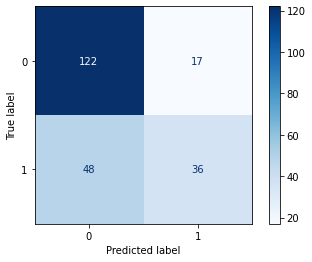

In [6]:
# pass it a trained model: it makes predictions for X_test and compares them to y_test
disp = plot_confusion_matrix(clf, X_test, y_test, cmap='Blues', values_format='d')

In [7]:
# print the "normal" confusion matrix
disp.confusion_matrix

array([[122,  17],
       [ 48,  36]], dtype=int64)

<a id='sect7_2'></a>
### <font color='darkgreen'>Compare multiple ROC curves in a single plot</font>
([course link](https://courses.dataschool.io/courses/scikit-learn-tips/986254-model-evaluation/2551120-21-compare-multiple-roc-curves-in-a-single-plot)) New in scikit-learn 0.22: Easily <a href='https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html'>compare multiple ROC curves</a> in a single plot!

Automatically displays the <a href='https://www.dataschool.io/roc-curves-and-auc-explained/'>AUC</a> for each model as well.

<b>Note</b>: Beginning in scikit-learn 1.0, the plot_roc_curve function has been deprecated in favor of <a href='https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html'>two new methods</a> in the <b><a href='https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html'>RocCurveDisplay</a></b> class.

In [8]:
import pandas as pd
df = pd.read_csv('http://bit.ly/kaggletrain')

In [9]:
cols = ['Pclass', 'Fare', 'SibSp']
X = df[cols]
y = df['Survived']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [12]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [13]:
lr.fit(X_train, y_train);
dt.fit(X_train, y_train);
rf.fit(X_train, y_train);

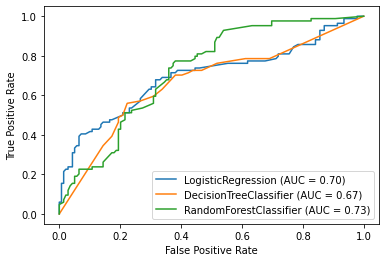

In [14]:
disp = plot_roc_curve(lr, X_test, y_test)
plot_roc_curve(dt, X_test, y_test, ax=disp.ax_);
plot_roc_curve(rf, X_test, y_test, ax=disp.ax_);

<a id='sect7_3'></a>
### <font color='darkgreen'>Use stratified sampling with train_test_split</font>
([course link](https://courses.dataschool.io/courses/scikit-learn-tips/986254-model-evaluation/2658930-26-use-stratified-sampling-with-train_test_split)) Are you using <a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html'>train_test_split</a> with a classification problem?

Be sure to set "<font color='blue'>stratify=y</font>" so that class proportions are preserved when splitting.

Especially important if you have class imbalance!

In [30]:
import pandas as pd
df = pd.DataFrame({'feature':list(range(8)), 'target':['not fraud']*6 + ['fraud']*2})

In [31]:
X = df[['feature']]
y = df['target']

In [32]:
from sklearn.model_selection import train_test_split

#### Not stratified
`y_train` contains NONE of the minority class, whereas `y_test` contains ALL of the minority class. (<font color='brown'>This is bad!</font>)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [34]:
y_train

3    not fraud
0    not fraud
5    not fraud
4    not fraud
Name: target, dtype: object

In [35]:
y_test

6        fraud
2    not fraud
1    not fraud
7        fraud
Name: target, dtype: object

#### Stratified
Class proportions are the SAME in `y_train` and `y_test`. (<font color='brown'>This is good!</font>)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0, stratify=y)

In [37]:
y_train

1    not fraud
7        fraud
2    not fraud
4    not fraud
Name: target, dtype: object

In [38]:
y_test

3    not fraud
6        fraud
0    not fraud
5    not fraud
Name: target, dtype: object

<a id='sect7_4'></a>
### <font color='darkgreen'>Shuffle your dataset when using cross_val_score</font>
([course link](https://courses.dataschool.io/courses/scikit-learn-tips/986254-model-evaluation/2709355-31-shuffle-your-dataset-when-using-cross_val_score)) If you use <a href='https://scikit-learn.org/stable/modules/cross_validation.html'>cross-validation</a> and your samples are NOT in an arbitrary order, <a href='https://scikit-learn.org/stable/modules/cross_validation.html#a-note-on-shuffling'>shuffling</a> may be required to get meaningful results.

Use <b><a href='https://scikit-learn.org/stable/modules/cross_validation.html#k-fold'>KFold</a></b> or <b><a href='https://scikit-learn.org/stable/modules/cross_validation.html#stratified-k-fold'>StratifiedKFold</a></b> in order to shuffle!

In [39]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score

In [40]:
# set up the regression problem
X_reg, y_reg = load_diabetes(return_X_y=True)
reg = LinearRegression()

In [41]:
# set up the classification problem
df = pd.read_csv('http://bit.ly/kaggletrain')
X_clf = df[['Pclass', 'Fare', 'SibSp']]
y_clf = df['Survived']
clf = LogisticRegression()

In [42]:
from sklearn.model_selection import KFold, StratifiedKFold

#### Use KFold with regression problems:

In [43]:
kf = KFold(5, shuffle=True, random_state=1)
cross_val_score(reg, X_reg, y_reg, cv=kf, scoring='r2')

array([0.43843604, 0.38982527, 0.52792606, 0.47359858, 0.57449343])

#### Use StratifiedKFold with classification problems:

In [44]:
skf = StratifiedKFold(5, shuffle=True, random_state=1)
cross_val_score(clf, X_clf, y_clf, cv=skf, scoring='accuracy')

array([0.65363128, 0.7247191 , 0.66853933, 0.68539326, 0.65730337])

<a id='sect7_5'></a>
### <font color='darkgreen'>Use AUC to evaluate multiclass problems</font>
([course link](https://courses.dataschool.io/courses/scikit-learn-tips/986254-model-evaluation/2709356-32-use-auc-to-evaluate-multiclass-problems)) <a href='https://scikit-learn.org/stable/modules/model_evaluation.html#receiver-operating-characteristic-roc'>AUC</a> is an excellent evaluation metric for binary classification, especially if you have class imbalance.

New in scikit-learn 0.22: AUC can be used with <a href='https://scikit-learn.org/stable/modules/model_evaluation.html#multi-class-case'>multiclass problems</a>! Supports "one-vs-one" and "one-vs-rest" strategies.

<b>Additional links</b>: <a href='https://www.dataschool.io/roc-curves-and-auc-explained/'>ROC curves and AUC explained</a> (<a href='https://www.dataschool.io/roc-curves-and-auc-explained/'>video</a>)

In [54]:
import numpy as np
from sklearn.datasets import load_wine

X, y = load_wine(return_X_y=True)

In [56]:
np.unique(y)  # Multiple class

array([0, 1, 2])

In [46]:
# only keep two features in order to make this problem harder
X = X[:, 0:2]

In [47]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

#### Multiclass AUC with train/test split

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf.fit(X_train, y_train)
y_score = clf.predict_proba(X_test)

In [57]:
# use 'ovo' (One-vs-One) or 'ovr' (One-vs-Rest)
roc_auc_score(y_test, y_score, multi_class='ovo')

0.9399801587301587

#### Multiclass AUC with cross-validation

In [58]:
from sklearn.model_selection import cross_val_score

In [61]:
# use 'roc_auc_ovo' (One-vs-One) or 'roc_auc_ovr' (One-vs-Rest)
# cross_val_score(clf, X, y, cv=5, scoring='roc_auc_ovr').mean()

<a id='sect8'></a>
## <font color='darkblue'>Model Inspection</font>
* <font size='3ptx'><b><a href='#sect8_1'>Display the intercept and coefficients for a linear model</a></b></font>
* <font size='3ptx'><b><a href='#sect8_2'>Visualize a decision tree two different ways</a></b></font>

<a id='sect8_1'></a>
### <font color='darkgreen'>Display the intercept and coefficients for a linear model</font>
([course link](https://courses.dataschool.io/courses/scikit-learn-tips/986255-model-inspection/2612755-23-display-the-intercept-and-coefficients-for-a-linear-model)) <br/>
<b>Q:</b> How do you display the intercept & coefficients for a linear model? <br/>
<b>A:</b> They are stored as attributes of the model: "<font color='violet'>intercept_</font>" and "<font color='violet'>coef_</font>" <br/>
<br/>
Attributes end with "_" if they are set during "fit"

In [1]:
from sklearn.datasets import load_diabetes
dataset = load_diabetes()

In [2]:
X, y = dataset.data, dataset.target
features = dataset.feature_names

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y);

In [4]:
model.intercept_

152.1334841628965

In [5]:
model.coef_

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

In [6]:
# display the feature names with the coefficients
list(zip(features, model.coef_))

[('age', -10.012197817471241),
 ('sex', -239.81908936565543),
 ('bmi', 519.8397867901339),
 ('bp', 324.39042768937713),
 ('s1', -792.1841616283075),
 ('s2', 476.7458378236643),
 ('s3', 101.0445703213447),
 ('s4', 177.0641762322503),
 ('s5', 751.2793210873953),
 ('s6', 67.62538639104402)]

<a id='sect8_2'></a>
### <font color='darkgreen'>Visualize a decision tree two different ways</font>
([course link](https://courses.dataschool.io/courses/scikit-learn-tips/986255-model-inspection/2613059-24-visualize-a-decision-tree-two-different-ways)) Two new functions in scikit-learn 0.21 for visualizing decision trees:
1. <a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html'>plot_tree</a>: uses Matplotlib (not Graphviz!)
2. <a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html'>export_text</a>: doesn't require any external libraries

In [7]:
import pandas as pd
df = pd.read_csv('http://bit.ly/kaggletrain')
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

In [8]:
features = ['Pclass', 'Fare', 'Sex']
X = df[features]
y = df['Survived']

In [9]:
classes = ['Deceased', 'Survived']

In [10]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=2, random_state=0)
dt.fit(X, y);

In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text  # both are new in 0.21

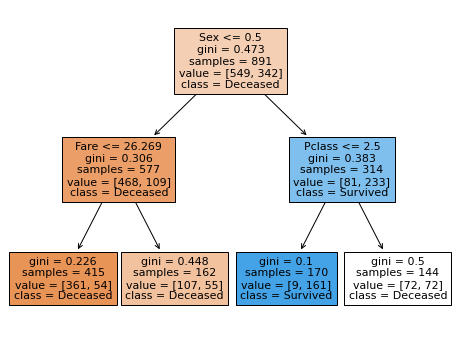

In [12]:
plt.figure(figsize=(8, 6))
plot_tree(dt, feature_names=features, class_names=classes, filled=True);

In [13]:
print(export_text(dt, feature_names=features, show_weights=True))

|--- Sex <= 0.50
|   |--- Fare <= 26.27
|   |   |--- weights: [361.00, 54.00] class: 0
|   |--- Fare >  26.27
|   |   |--- weights: [107.00, 55.00] class: 0
|--- Sex >  0.50
|   |--- Pclass <= 2.50
|   |   |--- weights: [9.00, 161.00] class: 1
|   |--- Pclass >  2.50
|   |   |--- weights: [72.00, 72.00] class: 0



<a id='sect9'></a>
## <font color='darkblue'>Model Ensembling</font> ([back](#sect0))
* <font size='3ptx'><b><a href='#sect9_1'>Ensemble multiple models using VotingClassifer or VotingRegressor</a></b></font>
* <font size='3ptx'><b><a href='#sect9_2'>Tune the parameters of a VotingClassifer or VotingRegressor</a></b></font>

<a id='sect9_1'></a>
### <font color='darkgreen'>Ensemble multiple models using VotingClassifer or VotingRegressor</font>
([course link](https://courses.dataschool.io/courses/scikit-learn-tips/986257-model-ensembling/2895558-46-ensemble-multiple-models-using-votingclassifer-or-votingregressor)) Want to improve your classifier's accuracy? Create multiple models and ensemble them using <b><a href='https://scikit-learn.org/stable/modules/ensemble.html#voting-classifier'>VotingClassifier</a></b>!

<b>P.S</b>. <b><a href='https://scikit-learn.org/stable/modules/ensemble.html#voting-regressor'>VotingRegressor</a></b> is also available

In [1]:
import pandas as pd
df = pd.read_csv('http://bit.ly/kaggletrain')

In [2]:
cols = ['Pclass', 'Parch', 'SibSp', 'Fare']
X = df[cols]
y = df['Survived']

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import cross_val_score

In [4]:
lr = LogisticRegression(solver='liblinear', random_state=1)
cross_val_score(lr, X, y).mean()

0.6835791852363318

In [5]:
rf = RandomForestClassifier(max_features=None, random_state=1)
cross_val_score(rf, X, y).mean()

0.6947774778733288

In [6]:
# create an ensemble for improved accuracy
vc = VotingClassifier([('clf1', lr), ('clf2', rf)], voting='soft')
cross_val_score(vc, X, y).mean()

0.7251020023852865

<a id='sect9_2'></a>
### <font color='darkgreen'>Tune the parameters of a VotingClassifer or VotingRegressor</font>
([course link](https://courses.dataschool.io/courses/scikit-learn-tips/986257-model-ensembling/2918959-47-tune-the-parameters-of-a-votingclassifer-or-votingregressor)) Want to improve the accuracy of your <b><a href='https://scikit-learn.org/stable/modules/ensemble.html#voting-classifier'>VotingClassifier</a></b>? Try tuning the '<font color='violet'>voting</font>' and '<font color='violet'>weights</font>' parameters to change how predictions are combined!

<b>P.S.</b> If you're using <b><a href='https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html'>VotingRegressor</a></b>, just tune the '<font color='violet'>weights</font>' parameter

<b>Additional links: <a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html'>GridSearchCV</a></b>

In [7]:
import pandas as pd
df = pd.read_csv('http://bit.ly/kaggletrain')

In [8]:
cols = ['Pclass', 'Parch', 'SibSp', 'Fare']
X = df[cols]
y = df['Survived']

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, GridSearchCV

In [10]:
lr = LogisticRegression(solver='liblinear', random_state=1)
rf = RandomForestClassifier(max_features=None, random_state=1)
nb = MultinomialNB()

In [11]:
# create an ensemble of 3 classifiers
vc = VotingClassifier([('clf1', lr), ('clf2', rf), ('clf3', nb)])
cross_val_score(vc, X, y).mean()

0.6970560542338836

In [12]:
# define VotingClassifier parameters to search
params = {'voting':['hard', 'soft'],
          'weights':[(1,1,1), (2,1,1), (1,2,1), (1,1,2)]}

In [13]:
# find the best set of parameters
grid = GridSearchCV(vc, params)
grid.fit(X, y)
grid.best_params_

{'voting': 'soft', 'weights': (1, 2, 1)}

In [14]:
# accuracy has improved
grid.best_score_

0.7262820915196786

<a id='sect10'></a>
## <font color='darkblue'>Feature Engineering</font>
* <font size='3ptx'><b><a href='#sect10_1'>Vectorize two text columns in a ColumnTransformer</a></b></font>
* <font size='3ptx'><b><a href='#sect10_2'>Use FunctionTransformer to convert functions into transformers</a></b></font>
* <font size='3ptx'><b><a href='#sect10_3'>Create feature interactions using PolynomialFeatures</a></b></font>

<a id='sect10_1'></a>
### <font color='darkgreen'>Vectorize two text columns in a ColumnTransformer</font>
([course link](https://courses.dataschool.io/courses/scikit-learn-tips/986258-feature-engineering/2686356-29-vectorize-two-text-columns-in-a-columntransformer)) Want to <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html'>vectorize</a> two text columns in a <b><a href='https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html'>ColumnTransformer</a></b>? You can't pass them in a list, but you can pass the vectorizer twice! (<font color='brown'>They'll learn separate vocabularies.</font>)

In [15]:
import pandas as pd
df = pd.read_csv('http://bit.ly/kaggletrain')

In [16]:
X = df[['Name', 'Cabin']].dropna()

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [18]:
from sklearn.compose import make_column_transformer
ct = make_column_transformer((vect, 'Name'), (vect, 'Cabin'))
ct.fit_transform(X)

<204x637 sparse matrix of type '<class 'numpy.int64'>'
	with 1119 stored elements in Compressed Sparse Row format>

<a id='sect10_2'></a>
### <font color='darkgreen'>Use FunctionTransformer to convert functions into transformers</font>
([course link](https://courses.dataschool.io/courses/scikit-learn-tips/986258-feature-engineering/2715039-33-use-functiontransformer-to-convert-functions-into-transformers)) Want to do <a href='https://www.dataschool.io/introduction-to-feature-engineering/'>feature engineering</a> within a <b><a href='https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html'>ColumnTransformer</a></b> or <b><a href='https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html'>Pipeline</a></b>?
1. Select an existing function (or write your own)
2. Convert it into a transformer using <b><a href='https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html'>FunctionTransformer</a></b>

In [19]:
import pandas as pd
import numpy as np
from sklearn.compose import make_column_transformer

In [20]:
X = pd.DataFrame({'Fare':[200, 300, 50, 900],
                  'Code':['X12', 'Y20', 'Z7', np.nan],
                  'Deck':['A101', 'C102', 'A200', 'C300']})

In [21]:
from sklearn.preprocessing import FunctionTransformer

#### Convert existing function into a transformer:

In [22]:
clip_values = FunctionTransformer(np.clip, kw_args={'a_min':100, 'a_max':600})

#### Convert custom function into a transformer:

In [23]:
# extract the first letter from each string
def first_letter(df):
    return df.apply(lambda x: x.str.slice(0, 1))

In [24]:
get_first_letter = FunctionTransformer(first_letter)

#### Include them in a ColumnTransformer:

In [25]:
ct = make_column_transformer(
    (clip_values, ['Fare']),
    (get_first_letter, ['Code', 'Deck']))

#### Apply the transformations:

In [26]:
X

,Fare,Code,Deck
0,200,X12,A101
1,300,Y20,C102
2,50,Z7,A200
3,900,NaN,C300


In [27]:
ct.fit_transform(X)

array([[200, 'X', 'A'],
       [300, 'Y', 'C'],
       [100, 'Z', 'A'],
       [600, nan, 'C']], dtype=object)

<a id='sect10_3'></a>
### <font color='darkgreen'>Create feature interactions using PolynomialFeatures</font>
([course link](https://courses.dataschool.io/courses/scikit-learn-tips/986258-feature-engineering/2847419-45-create-feature-interactions-using-polynomialfeatures)) Want to include "feature interactions" in your model? Use <b><a href='https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html'>PolynomialFeatures</a></b>!

<b>P.S.</b> This is impractical if you have lots of features, and unnecessary if you're using a <a href='https://scikit-learn.org/stable/modules/tree.html'>tree-based model</a>.

In [28]:
import pandas as pd
X = pd.DataFrame({'A':[1, 2, 3], 'B':[4, 4, 4], 'C':[0, 10, 100]})

In [29]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias=False, interaction_only=True)

In [30]:
X

,A,B,C
0,1,4,0
1,2,4,10
2,3,4,100


In [31]:
# Output columns: A, B, C, A*B, A*C, B*C
poly.fit_transform(X)

array([[  1.,   4.,   0.,   4.,   0.,   0.],
       [  2.,   4.,  10.,   8.,  20.,  40.],
       [  3.,   4., 100.,  12., 300., 400.]])

<a id='sect11'></a>
## <font color='darkblue'>Coding Practices</font> ([back](#sect0))
* <font size='3ptx'><b><a href='#sect11_1'>Set a "random_state" to make your code reproducible</a></b></font>
* <font size='3ptx'><b><a href='#sect11_2'>Most parameters should be passed as keyword arguments</a></b></font>

<a id='sect11_1'></a>
### <font color='darkgreen'>Set a "random_state" to make your code reproducible</font>
([course link](https://courses.dataschool.io/courses/scikit-learn-tips/986259-coding-practices/2350288-10-set-a-random_state-to-make-your-code-reproducible)) <br/>
<b>Q:</b> Why set a value for "random_state"?
> Ensures that a "random" process will output the same results every time, which makes your code reproducible (by you and others!)

In [32]:
import pandas as pd
df = pd.read_csv('http://bit.ly/kaggletrain', nrows=6)

In [34]:
cols = ['Fare', 'Embarked', 'Sex']
X = df[cols]
y = df['Survived']

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X

,Fare,Embarked,Sex
0,7.2500,S,male
1,71.2833,C,female
2,7.9250,S,female
3,53.1000,S,female
4,8.0500,S,male
5,8.4583,Q,male


In [37]:
# any positive integer can be used for the random_state value
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
X_train

,Fare,Embarked,Sex
0,7.2500,S,male
3,53.1000,S,female
5,8.4583,Q,male


In [38]:
# using the SAME random_state value results in the SAME random split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
X_train

,Fare,Embarked,Sex
0,7.2500,S,male
3,53.1000,S,female
5,8.4583,Q,male


In [39]:
# using a DIFFERENT random_state value results in a DIFFERENT random split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)
X_train

,Fare,Embarked,Sex
2,7.9250,S,female
5,8.4583,Q,male
0,7.2500,S,male


<a id='sect11_2'></a>
### <font color='darkgreen'>Most parameters should be passed as keyword arguments</font>
([course link](https://courses.dataschool.io/courses/scikit-learn-tips/986259-coding-practices/2788947-36-most-parameters-should-be-passed-as-keyword-arguments)) New in version 0.23: Most parameters are now expected to be passed as <a href='https://treyhunner.com/2018/04/keyword-arguments-in-python/'>keyword arguments</a>.

They will raise a warning ⚠️ if passed positionally, and will error 🛑 starting in 0.25.

<b>Additional links</b>: <b><a href='https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html'>SVC</a></b>, <b><a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>LogisticRegression</a></b>, <a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html'>cross_val_score</a> <br/>
<b>Note:</b> scikit-learn 0.25 has been renamed to scikit-learn 1.0.

In [40]:
from sklearn.svm import SVC

In [41]:
# positional arguments
clf = SVC(0.1, 'linear')

c:\users\john\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass C=0.1, kernel=linear as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [42]:
# keyword arguments
clf = SVC(C=0.1, kernel='linear')